# Analyse de données - Yohan Ruffieux
## LeRadeau-Data

In [27]:
import pandas as pd

file_path = './data/LeRadeau-Data.xlsx'

df=pd.read_excel(file_path)
df

,Risk,Host,ProductType,Protocol,Port,Name,Synopsis,Solution,See Also,CVSS v3.0 Base Score,VPR Score
0,Medium,192.168.71.1,Firewall,icmp,0,ICMP Timestamp Request Remote Date Disclosure,It is possible to determine the exact time set...,"Filter out the ICMP timestamp requests (13), a...",NaN,4.0,0.8
1,Low,192.168.71.1,Firewall,udp,67,DHCP Server Detection,The remote DHCP server may expose information ...,Apply filtering to keep this information off t...,NaN,NaN,NaN
2,NaN,192.168.71.1,Firewall,tcp,0,Nessus Scan Information,This plugin displays information about the Nes...,NaN,NaN,NaN,NaN
3,Low,192.168.71.1,Firewall,tcp,22,SSH Weak Key Exchange Algorithms Enabled,The remote SSH server is configured to allow w...,Contact the vendor or consult product document...,https://datatracker.ietf.org/doc/html/rfc9142,3.7,NaN
4,Medium,192.168.71.1,Firewall,tcp,22,SSH Terrapin Prefix Truncation Weakness (CVE-2...,The remote SSH server is vulnerable to a mitm ...,Contact the vendor for an update with the stri...,https://terrapin-attack.com/,5.9,6.7
...,...,...,...,...,...,...,...,...,...,...,...
102,Low,WLRA004,Périphérique,tcp,2002,SSL Certificate Chain Contains RSA Keys Less T...,The X.509 certificate chain used by this servi...,Replace the certificate in the chain with the ...,https://www.cabforum.org/wp-content/uploads/Ba...,NaN,NaN
103,NaN,WLRA009,Périphérique,tcp,0,Nessus Scan Information,This plugin displays information about the Nes...,NaN,NaN,NaN,NaN
104,Medium,WLRA009,Périphérique,tcp,445,SMB Signing not required,Signing is not required on the remote SMB server.,Enforce message signing in the host's configur...,http://www.nessus.org/u?df39b8b3\nhttp://techn...,5.3,NaN
105,NaN,WLTR015,Périphérique,tcp,0,Nessus Scan Information,This plugin displays information about the Nes...,NaN,NaN,NaN,NaN


Les colonnes à disposition sont les suivantes :

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Risk                  83 non-null     object 
 1   Host                  107 non-null    object 
 2   ProductType           107 non-null    object 
 3   Protocol              107 non-null    object 
 4   Port                  107 non-null    int64  
 5   Name                  107 non-null    object 
 6   Synopsis              107 non-null    object 
 7   Solution              83 non-null     object 
 8   See Also              48 non-null     object 
 9   CVSS v3.0 Base Score  74 non-null     float64
 10  VPR Score             27 non-null     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 9.3+ KB


Suppression des colonnes qui me semblent inutiles pour l'analyse

In [29]:
df_opti = df.drop(columns=['Synopsis','Solution','See Also'])

Un petit aperçu des valeurs vides dans le document :

In [30]:
df_opti.isnull().sum()

Risk                    24
Host                     0
ProductType              0
Protocol                 0
Port                     0
Name                     0
CVSS v3.0 Base Score    33
VPR Score               80
dtype: int64

In [31]:
df_opti.isnull().sum().sum()

np.int64(137)

Il y a un total de 137 valeurs vides, principalement à cause des scores manquants, ce n'est pas très grave, on peut partir du principe que les scores manquants sont des scores de 0, donc avec peu de risque.

## Distribution de certaines valeurs

### Distribution des types de produits

<Axes: title={'center': 'Distribution of Product Types'}, xlabel='Type of Product', ylabel='Number of Occurrences'>

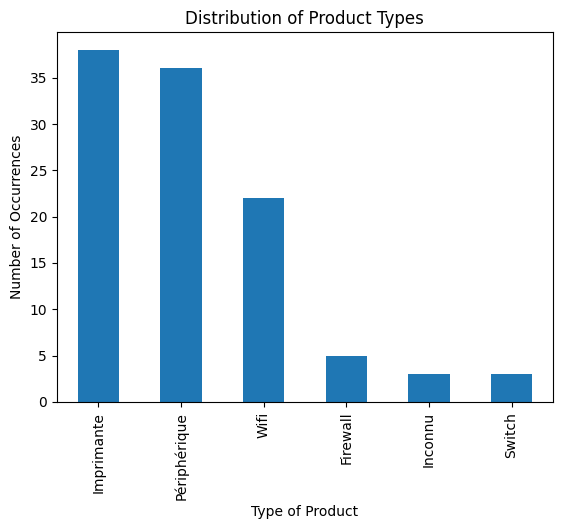

In [32]:
df_opti['ProductType'].value_counts().plot(kind='bar', title='Distribution of Product Types', xlabel='Type of Product', ylabel='Number of Occurrences')

In [33]:
risk_colors = {
    'Low': '#00FF00',  # Green
    'Medium': '#FFFF00',  # Yellow
    'High': '#FF0000',  # Red
    'Critical': '#990000'  # Dark red
}

### Distribution des risques

<Axes: title={'center': 'Distribution of Risk'}, xlabel='Type of Risk', ylabel='Number of Occurrences'>

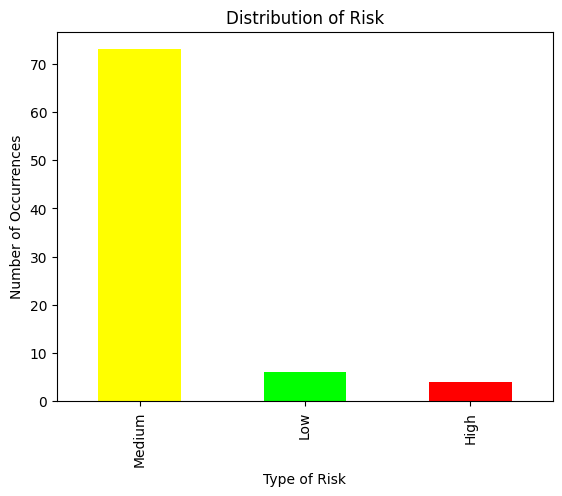

In [34]:
risk = df_opti['Risk'].value_counts()

colors = [risk_colors[r] for r in risk.index]
risk.plot(kind='bar', title='Distribution of Risk', xlabel='Type of Risk', ylabel='Number of Occurrences', color=colors)

#### Distribution des risques en pourcentage

<Axes: title={'center': 'Distribution of Risk'}>

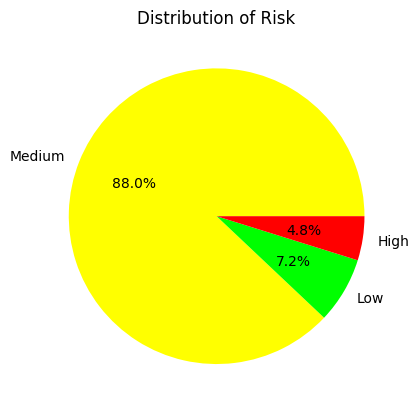

In [35]:
risk.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Risk', ylabel='', colors=colors)

On peut voir qu'il y a une grande majorité d'alertes à risque moyen et qu'il y a très peu d'alertes à risque hauts, donc c'est plutôt rassurant.

### Graphique de la distribution des risques par type de produit

In [36]:
risk_distribution = df_opti.groupby('ProductType')['Risk'].value_counts().unstack()
types = df_opti['ProductType'].unique()

<Axes: title={'center': 'Risk Distribution by Product Type'}, xlabel='Type of Product', ylabel='Number of Occurrences'>

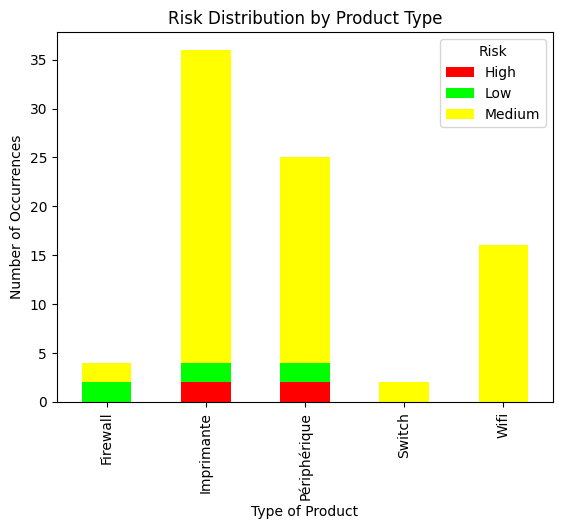

In [37]:
risk_distribution.plot(kind='bar', stacked=True, title='Risk Distribution by Product Type', xlabel='Type of Product', ylabel='Number of Occurrences', color=[risk_colors[r] for r in risk_distribution.columns])

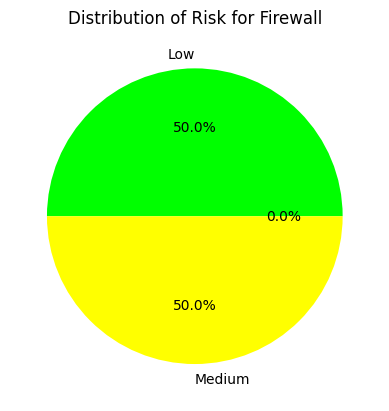

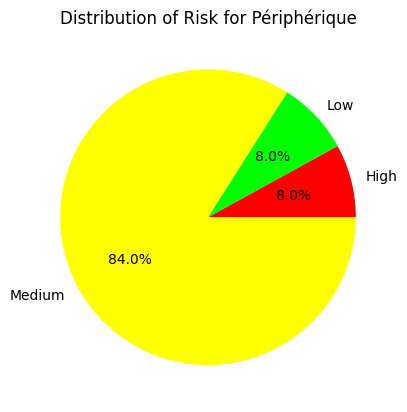

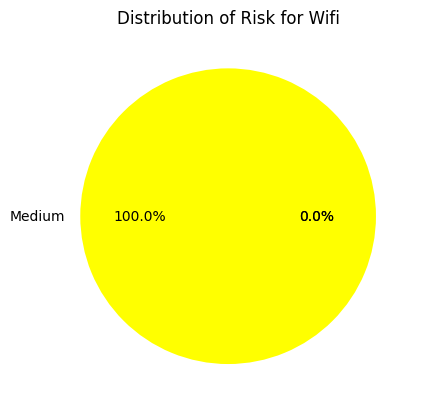

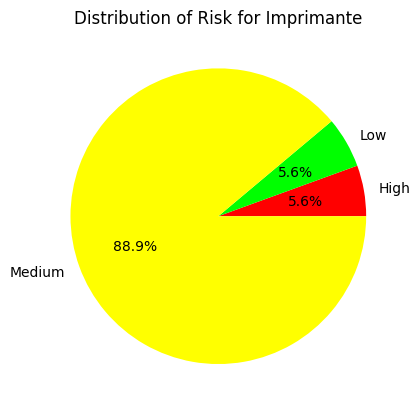

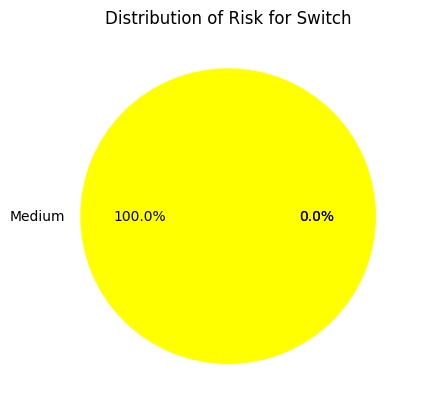

In [38]:
from matplotlib import pyplot as plt

for type in types:
    if type != "Inconnu":
        risk = risk_distribution.loc[type].fillna(0)
        colors = [risk_colors[r] for r in risk.index]
        risk.plot(kind='pie', autopct='%1.1f%%', title=f'Distribution of Risk for {type}', ylabel='', colors=colors)
        plt.show()

## Quelques statistiques
### Top 3 des types de machines avec le plus d'alertes

In [39]:
total_alerts = df_opti.groupby('ProductType')['Risk'].count()
total_alerts = total_alerts.sort_values(ascending=False)
for productType, percentage in total_alerts.head(3).items():
    print(f'{productType}: {percentage} alerts in total')
    

Imprimante: 36 alerts in total
Périphérique: 25 alerts in total
Wifi: 16 alerts in total


### Top 2 des types de machines avec le plus d'alertes à haut risque en pourcentage

In [40]:
critical_alerts = df_opti[df_opti['Risk'] == 'High'].groupby('ProductType')['Risk'].count()
total_alerts = df_opti.groupby('ProductType')['Risk'].count()
critical_alerts_percentage = (critical_alerts / total_alerts).sort_values(ascending=False)
for type, percentage in critical_alerts_percentage.head(2).items():
    print(f'{type}: {percentage:.1%} of critical alerts')

Périphérique: 8.0% of critical alerts
Imprimante: 5.6% of critical alerts


### Le top 3 des host avec le plus d'alertes

In [41]:
top_hosts = df_opti['Host'].value_counts().head(3)
top_hosts

Host
192.168.71.50    27
i101             11
192.168.71.67     9
Name: count, dtype: int64

En voyant ça, on peut se dire qu'il faudrait regarder de plus près ces machines pour voir si il n'y a pas un problème de sécurité.

### Le top 3 des host avec le plus d'alertes à haut risque

In [42]:
top_hosts_critical = df_opti[df_opti['Risk'] == 'High']['Host'].value_counts().head(3)
top_hosts_critical

Host
192.168.71.50    1
192.168.71.67    1
i101             1
Name: count, dtype: int64

En voyant ces chiffres, on voit qu'il n'y a que une alerte à haut risque au maximum par machine, donc c'est plutôt rassurant.

### La distribution globale des scores CVSS et VPR
Rappel : plus on se rapproche de 10, plus le risque est élevé

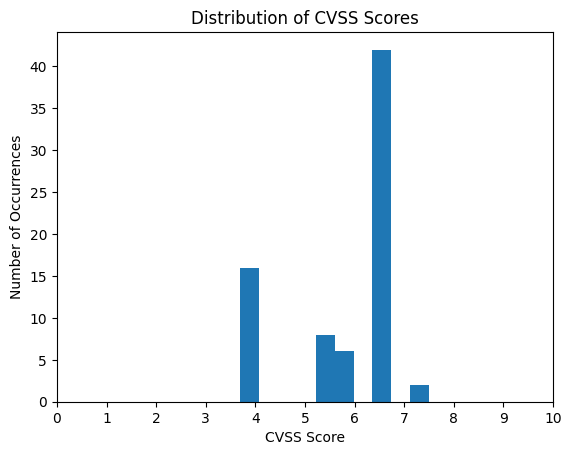

In [43]:
df_opti['CVSS v3.0 Base Score'].plot(kind='hist', title='Distribution of CVSS Scores', xlabel='CVSS Score',
                                     ylabel='Number of Occurrences')
plt.xlim(0, 10)
plt.xticks(range(0, 11))
plt.show()

In [44]:
df_opti['CVSS v3.0 Base Score'].mean()

np.float64(5.804054054054054)

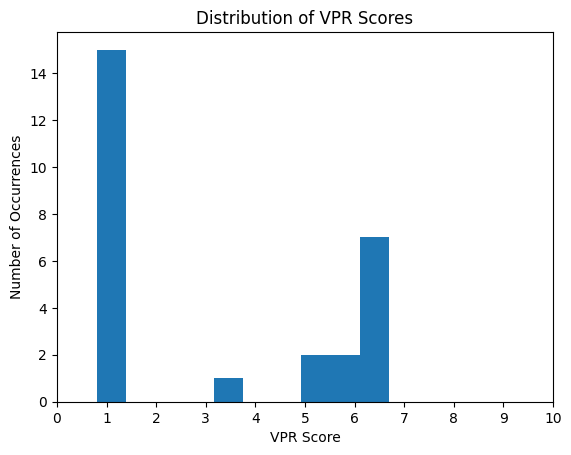

In [45]:
df_opti['VPR Score'].plot(kind='hist', title='Distribution of VPR Scores', xlabel='VPR Score',
                          ylabel='Number of Occurrences')
plt.xlim(0, 10)
plt.xticks(range(0, 11))
plt.show()

In [46]:
df_opti['VPR Score'].mean()

np.float64(3.1370370370370377)

Avec un score moyen de 5.8 et 3.1, on peut dire que les risques sont plutôt bas, ce qui est une bonne nouvelle.

### Le top 3 des ports qui provoquent le plus d'alertes

In [47]:
top_ports = df_opti['Port'].value_counts().head(3)
top_ports

Port
0       39
443     11
8443     9
Name: count, dtype: int64

On peut voir que les ports 443 et 8443 provoquent le plus d'alertes, le port 0 je pense que c'est un port par défaut qui est utilisé pour les alertes qui ne sont pas liées à un port spécifique, donc c'est normal qu'il soit en tête de liste.

### Le top 3 des ports qui provoquent le plus d'alertes à haut risque

In [48]:
top_ports_critical = df_opti[df_opti['Risk'] == 'High']['Port'].value_counts().head(3)
top_ports_critical

Port
161     2
8009    1
2002    1
Name: count, dtype: int64

On peut en conclure que les ports 161, 8009 et 2002 sont les plus critiques, il faudrait donc regarder de plus près ces ports pour voir si il n'y a pas un problème de sécurité.

In [50]:
import os
os.system('jupyter nbconvert --to markdown LeRadeau-Data_Analyse.ipynb')

0